In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el archivo Excel
file_path = "Internet(adaptado).xlsx" 
xls = pd.ExcelFile(file_path)

# Mostrar las hojas disponibles en el archivo
xls.sheet_names

['Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Totales Accesos Por Tecnología',
 'Penetración-poblacion',
 'Ingresos ']

In [4]:
# Cargar la hoja "Velocidad_sin_Rangos"
df_velocidad = pd.read_excel(xls, sheet_name="Velocidad_sin_Rangos")

# Mostrar las primeras filas
df_velocidad.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


In [5]:
# Verificar tipos de datos
df_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB


In [6]:
# Contar valores nulos por columna
df_velocidad.isnull().sum()

Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64

In [7]:
# Contar registros duplicados
df_velocidad.duplicated().sum()

0

In [8]:
# Rellenar los valores nulos en "Velocidad" con la mediana de la columna
df_velocidad["Velocidad"].fillna(df_velocidad["Velocidad"].median(), inplace=True)

# Verificar que ya no haya valores nulos
df_velocidad.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_17872\2770728471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_velocidad["Velocidad"].fillna(df_velocidad["Velocidad"].median(), inplace=True)


Año          0
Trimestre    0
Provincia    0
Velocidad    0
Accesos      0
dtype: int64

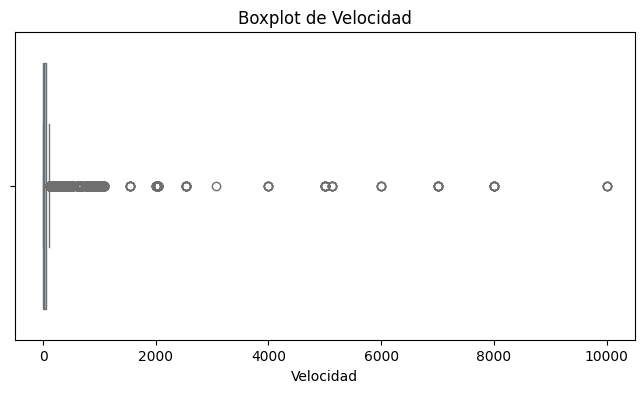

In [9]:
# Visualizar los valores atípicos de la variable velocidad con un boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_velocidad["Velocidad"], color="skyblue")
plt.title("Boxplot de Velocidad")
plt.show()

In [10]:
# Calcular los límites con el rango intercuartílico (IQR)
Q1 = df_velocidad["Velocidad"].quantile(0.25)  # Primer cuartil (Q1)
Q3 = df_velocidad["Velocidad"].quantile(0.75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar cuántos outliers hay
outliers = df_velocidad[(df_velocidad["Velocidad"] < limite_inferior) | (df_velocidad["Velocidad"] > limite_superior)]
print(f"Se encontraron {outliers.shape[0]} valores atípicos en la columna 'Velocidad'.")


Se encontraron 2800 valores atípicos en la columna 'Velocidad'.


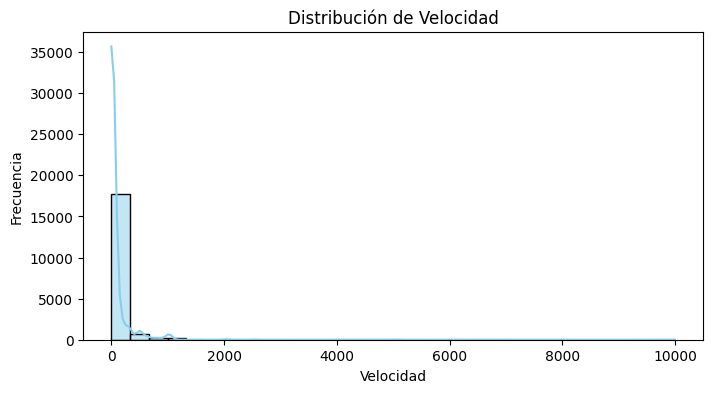

In [11]:
# Visualizar la distribución de los datos
plt.figure(figsize=(8, 4))
sns.histplot(df_velocidad["Velocidad"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de Velocidad")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.show()

Análisis de la Distribución de Velocidad

Forma de la Distribución:

La distribución no es completamente normal; parece tener una ligera asimetría.
Hay valores extremos en el lado derecho (altas velocidades), lo que sugiere la presencia de outliers.Como forman parte de la realidad se decidio mantenerlos para su analisis y en base a esto, a los datos nulos se los decidio imputarlos con la mediana.

In [12]:
# Estandarizar la variable categorica Provincia

df_velocidad["Provincia"].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN',
       'Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [13]:
# Normalizar nombres de provincias a formato "Title Case"
df_velocidad["Provincia"] = df_velocidad["Provincia"].str.title()

# Reemplazar "Caba" por "Capital Federal"
df_velocidad["Provincia"] = df_velocidad["Provincia"].replace("Caba", "Capital Federal")

# Verificar nuevamente los valores únicos
df_velocidad["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Cordoba', 'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen',
       'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman',
       'Córdoba', 'Entre Ríos', 'Neuquén', 'Río Negro', 'Tucumán'],
      dtype=object)

In [14]:
# Cargar la segunda hoja
df_accesos_tecnologia = pd.read_excel(file_path, sheet_name="Accesos_tecnologia_localidad")

In [15]:
df_accesos_tecnologia.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [16]:
# Verificar tipos de datos
df_accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


In [17]:
# Contar registros duplicados
df_accesos_tecnologia.duplicated().sum()

0

In [18]:
# Contar valores nulos por columna
df_accesos_tecnologia.isnull().sum()

Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64

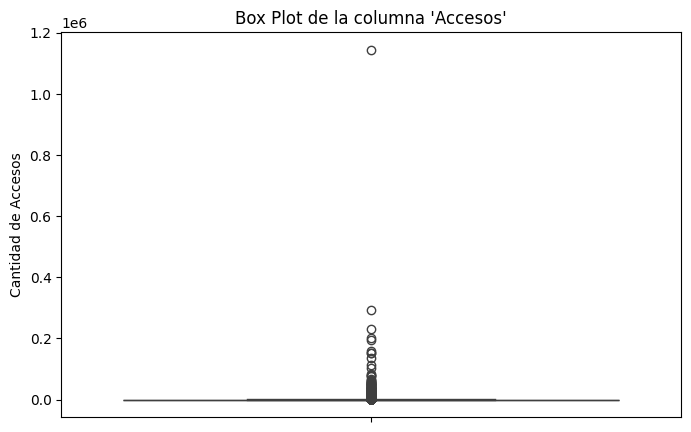

In [19]:
# Visualizar los valores de la variable accesos con un boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_accesos_tecnologia["Accesos"])
plt.title("Box Plot de la columna 'Accesos'")
plt.ylabel("Cantidad de Accesos")
plt.show()

In [20]:
# Calcular los límites con el rango intercuartílico (IQR)
Q1 = df_accesos_tecnologia["Accesos"].quantile(0.25)  # Primer cuartil (Q1)
Q3 = df_accesos_tecnologia["Accesos"].quantile(0.75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar cuántos outliers hay
outliers = df_accesos_tecnologia[(df_accesos_tecnologia["Accesos"] < limite_inferior) | (df_accesos_tecnologia["Accesos"] > limite_superior)]
print(f"Se encontraron {outliers.shape[0]} valores atípicos en la columna 'Accesos'.")

Se encontraron 1196 valores atípicos en la columna 'Accesos'.


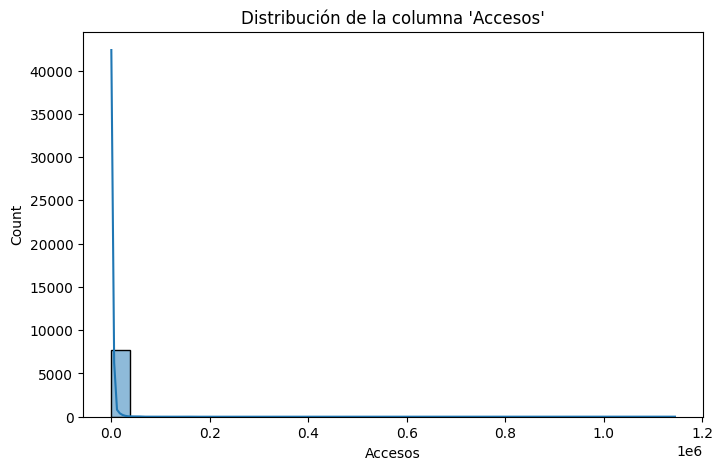

In [21]:
# Histograma para visualizar la distribución
plt.figure(figsize=(8,5))
sns.histplot(df_accesos_tecnologia["Accesos"].dropna(), bins=30, kde=True)
plt.title("Distribución de la columna 'Accesos'")
plt.show()

Análisis de la Distribución de Accesos

Forma de la Distribución:

La distribución tiende a ser normal; aunque tiene valores extremos en el lado derecho (muchos accesos), lo que sugiere la presencia de outliers.Como forman parte de la realidad se decidio mantenerlos para su analisis y en base a esto, a los datos nulos se los decidio imputarlos con el promedio.

In [22]:
# Calcular el promedio de la columna "Accesos" (ignorando nulos)
mean_value = df_accesos_tecnologia["Accesos"].mean()

# Reemplazar los valores nulos con el promedio
df_accesos_tecnologia["Accesos"].fillna(mean_value, inplace=True)

# Verificar si aún quedan valores nulos
print(df_accesos_tecnologia.isnull().sum())

Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_17872\1892018161.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_accesos_tecnologia["Accesos"].fillna(mean_value, inplace=True)


In [23]:
# Convertir la columna "Accesos" a entero
df_accesos_tecnologia["Accesos"] = df_accesos_tecnologia["Accesos"].astype(int)

# Verificar el tipo de dato después de la conversión
print(df_accesos_tecnologia.dtypes)


Provincia     object
Partido       object
Localidad     object
Tecnologia    object
Link Indec    object
Accesos        int32
dtype: object


In [31]:
# Ver valores únicos en la columna "Provincia"
df_accesos_tecnologia["Provincia"].unique()

array(['Buenos Aires', 'Caba', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba',
       'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy', 'La Pampa',
       'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
       'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman'], dtype=object)

In [25]:
# Normalizar nombres de provincias a formato "Title Case"
df_accesos_tecnologia["Provincia"] = df_accesos_tecnologia["Provincia"].str.title()

In [26]:
# Ver valores únicos en la columna "Partido"
df_accesos_tecnologia["Partido"].unique()


array(['25 de Mayo', '9 de Julio', 'Adolfo Alsina',
       'Adolfo Gonzales Chaves', 'Alberti', 'Almirante Brown', 'AMBA',
       'Arrecifes', 'Avellaneda', 'Ayacucho', 'Azul', 'Bahía Blanca',
       'Balcarce', 'Baradero', 'Benito Juárez', 'Berazategui', 'Berisso',
       'Bolívar', 'Bragado', 'Brandsen', 'Campana', 'Cañuelas',
       'Capitán Sarmiento', 'Carlos Casares', 'Carlos Tejedor',
       'Carmen de Areco', 'Castelli', 'Chacabuco', 'Chascomús',
       'Chivilcoy', 'Colón', 'Coronel de Marina L. Rosales',
       'Coronel Dorrego', 'Coronel Pringles', 'Coronel Suárez',
       'Daireaux', 'Dolores', 'Ensenada', 'Escobar', 'Esteban Echeverría',
       'Exaltación de la Cruz', 'Ezeiza', 'Florencio Varela',
       'Florentino Ameghino', 'General Alvarado', 'General Arenales',
       'General Belgrano', 'General Guido', 'General Juan Madariaga',
       'General La Madrid', 'General Las Heras', 'General Lavalle',
       'General Paz', 'General Pinto', 'General Pueyrredón',
       'Ge

In [27]:
# Ver valores únicos en la columna "Localidad"
df_accesos_tecnologia["Localidad"].unique()

array(['25 de Mayo', 'Del Valle', 'Ernestina', ..., 'Villa  de Trancas',
       'Villa Carmela', 'Yerba Buena - Marcos Paz'], dtype=object)

In [30]:
# Ver valores únicos en la columna "Tecnologia"
df_accesos_tecnologia["Tecnologia"].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'OTROS', 'DIAL UP', 'WIMAX'], dtype=object)

In [29]:
# Diccionario de mapeo para estandarizar la columna "Tecnologia"
technology_mapping = {
    "CABLEMODEM": "CABLEMODEM",
    "Cablemodem": "CABLEMODEM",
    "OTROS": "OTROS",
    "Otros": "OTROS"
}

# Aplicar la estandarización a la columna "Tecnologia"
df_accesos_tecnologia["Tecnologia"] = df_accesos_tecnologia["Tecnologia"].replace(technology_mapping)

In [32]:
# Cargar la hoja "Totales Accesos Por Tecnologia"
df_totales_accesos = pd.read_excel(xls, sheet_name="Totales Accesos Por Tecnología")

# Mostrar las primeras filas
df_totales_accesos.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [33]:
# Verificar tipos de datos
df_totales_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


In [34]:
# Contar valores nulos por columna
df_totales_accesos.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [35]:
# Contar registros duplicados
df_totales_accesos.duplicated().sum()

0

In [36]:
# Cargar la hoja "Penetración-poblacion"
df_penetracion = pd.read_excel(xls, sheet_name="Penetración-poblacion")

# Mostrar las primeras filas
df_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [37]:
# Verificar tipos de datos
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [38]:
# Contar valores nulos por columna
df_penetracion.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [39]:
# Contar registros duplicados
df_penetracion.duplicated().sum()

0

In [40]:
# Ver valores únicos en la columna "Provincia"
df_penetracion["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

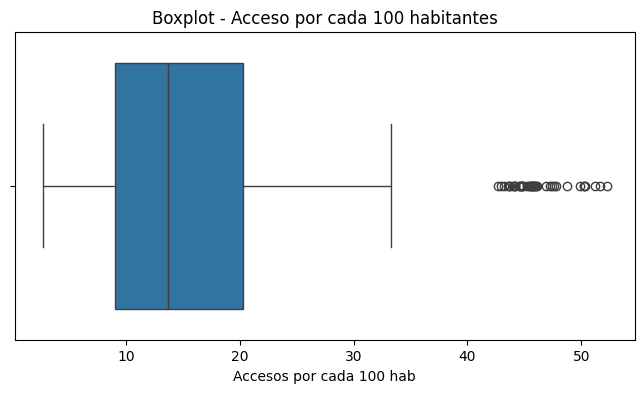

In [41]:
# Graficar boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_penetracion["Accesos por cada 100 hab"])
plt.title("Boxplot - Acceso por cada 100 habitantes")
plt.show()

In [42]:
# Cargar la hoja "Ingresos"
df_ingresos = pd.read_excel(xls, sheet_name="Ingresos ")

# Mostrar las primeras filas
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [43]:
# Verificar tipos de datos
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [44]:
# Mostrar números sin notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Mostrar las primeras filas
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,442032166.69,Abr-Jun 2024
1,2024,1,346198986.13,Ene-Mar 2024
2,2023,4,167376014.80,Oct-Dic 2023
3,2023,3,133106593.41,Jul-Sept 2023
4,2023,2,118060280.28,Jun-Mar 2023


In [45]:
# Contar valores nulos por columna
df_ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [46]:
# Contar registros duplicados
df_ingresos.duplicated().sum()

0

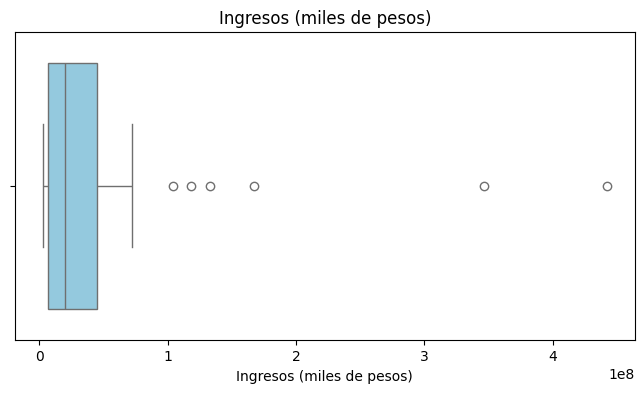

In [47]:
# Visualizar los valores de la variable Ingresos con un boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_ingresos["Ingresos (miles de pesos)"], color="skyblue")
plt.title("Ingresos (miles de pesos)")
plt.show()

In [50]:
with pd.ExcelWriter('dataset_internet.xlsx') as writer:
    # Guardar cada DataFrame en una hoja separada
    df_ingresos.to_excel(writer, sheet_name='Ingresos', index=False)
    df_velocidad.to_excel(writer, sheet_name='Velocidad_sin_Rangos', index=False)
    df_accesos_tecnologia.to_excel(writer, sheet_name='Accesos_tecnologia_localidad', index=False)
    df_totales_accesos.to_excel(writer, sheet_name='Totales Accesos Por Tecnología', index=False)
    df_penetracion.to_excel(writer, sheet_name='Penetracion-poblacion', index=False)